# Independent Samples $t$-Test

Let's load some data sets for the examples we will need to analyze.

In [1]:
pers <- read.csv('http://faculty.ung.edu/rsinn/data/personality.csv')
births <-  read.csv('http://faculty.ung.edu/rsinn/data/baby.csv')
united <- read.csv('http://faculty.ung.edu/rsinn/data/united.csv')
airports <- read.csv('http://faculty.ung.edu/rsinn/data/airports.csv')

## Example 1: Airports and Delays

Are delays at southern airports less than the delays at northern airports where bad weather like snow and ice is more common? Compare the average delays at 2 southerm airports:

- ATL, Atlanta
- DFW, Dallas Fort Worth

To the average delays at two northern airports:

- PHL, Philadelphia
- CLE, Cleveland

Determine if there is a difference in average delays using the $\alpha = 0.05$ level.

### Standard Descriptives for Both Samples

In [2]:
south <- subset(united, Destination == 'ATL' | Destination == 'DFW')
m_s <- mean(south[ , 'Delay'])
s_s <- sd(south[ , 'Delay'])
n_s <- length(south[ , 'Delay'])
cat('The standard descriptives for the southern airports:
  Mean = ',m_s,'\n  Std. Deviation = ',s_s, '\n  Sample Size = ', n_s)

The standard descriptives for the southern airports:
  Mean =  17.45921 
  Std. Deviation =  33.52937 
  Sample Size =  331

In [3]:
north <- subset(united, Destination == 'CLE' | Destination == 'PHL') # | Destination == 'ORD')
m_n <- mean(north[ , 'Delay'])
s_n <- sd(south[ , 'Delay'])
n_n <- length(north[ , 'Delay'])
cat('The standard descriptives for the northern airports:
  Mean = ',m_n,'\n  Std. Deviation = ',s_n, '\n  Sample Size = ', n_n)

The standard descriptives for the northern airports:
  Mean =  18.9104 
  Std. Deviation =  33.52937 
  Sample Size =  346

### Verification of Assumptions

Checking normality, we will analyze both a density plot and a QQ plot for both samples.

#### Airports Data and Normality

We create density plots and QQ normal plots for both samples.

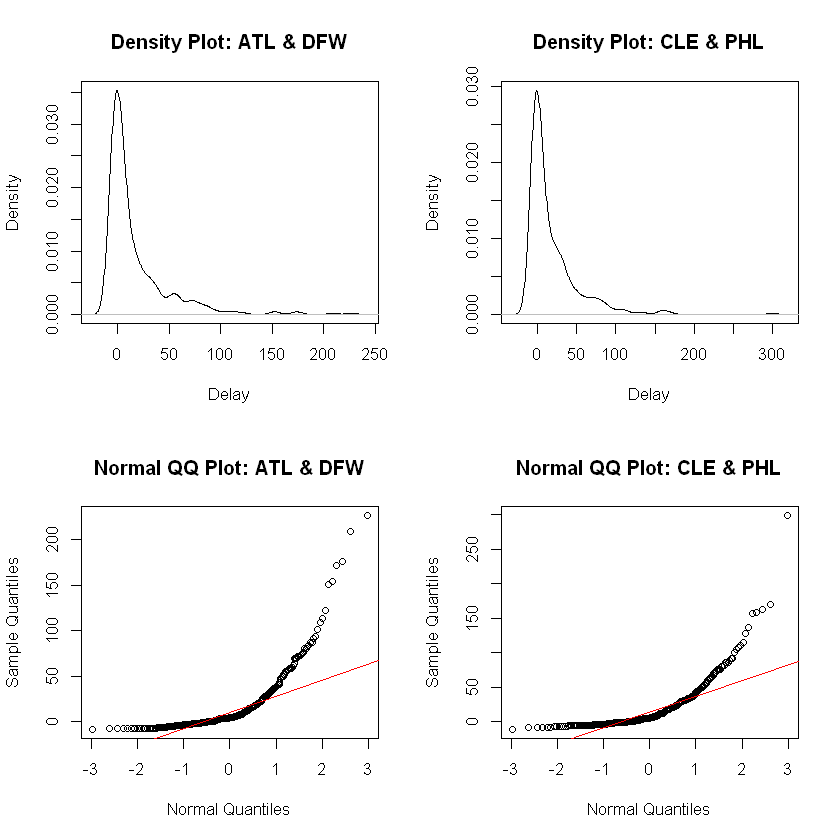

In [4]:
plt <- layout(matrix(c(1,2,3,4), ncol = 2), heights = lcm(9))

plot(density(south[ , 'Delay']), main = 'Density Plot: ATL & DFW', xlab = 'Delay')
plot2 <- {qqnorm(south[ , 'Delay'], main = 'Normal QQ Plot: ATL & DFW', xlab = 'Normal Quantiles')
qqline(south[ , 'Delay'], col = 'red')    
}
plot(density(north[ , 'Delay']), main = 'Density Plot: CLE & PHL', xlab = 'Delay')
plot3 <- {qqnorm(north[ , 'Delay'], main = 'Normal QQ Plot: CLE & PHL', xlab = 'Normal Quantiles')
qqline(north[ , 'Delay'], col = 'red')    
}

**Analysis.** The density plots concerns us because we see an approximately bell-shaped distribution but with a <b><span style="color: purple" >massive skew to the right</span></b>. The QQ plot shows the impact of the massive outliers which render the outcome a very non-normal distribution. We must reject this sample as <b><span style="color: red" >not normal</span></b>.

Given the radical skewing to the right for both samples and lack of evidence in the QQ plots that the distributions are normal, we reject these data as <b><span style="color: purple" >unacceptable for $t$ procedures</span></b>.

#### Results

We will not run a $t$-test on these data as they <b><span style="color: red" >do not meet the requirements of the normality assumption</span></b>.

## Example 2: Births and Smoking during Pregnancy

Does smoking during pregnancy affect the health of the baby at birth? Test at the $\alpha = 0.05$ level using **Birth Weight** as a proxy variable for health of the baby.

In [5]:
head(births,5)

Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


We need 2 vectors, one for the birth weight data from the smoking moms group and the other from the non-smoking moms group.

```{warning}
The values in the "Maternal Smoker" column are not the boolean variables TRUE and FALSE. The values in this data frame are strings, actual text. Thus, the subsetting used is for text but would look quite different in the boolean variable case.
```

In [6]:
smoke = subset(births, Maternal.Smoker == 'True')
head(smoke, 3)

,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
3,128,279,28,64,115,True
4,108,282,23,67,125,True
9,143,299,30,66,136,True


In [7]:
non = subset(births, Maternal.Smoker == 'False')
head(non, 3)

,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
1,120,284,27,62,100,False
2,113,282,33,64,135,False
5,136,286,25,62,93,False


With the table subsetted properly, we now have need for vectors for both the smoking and non-smoking case. The correct format for extracting the correct values from the table are shown below:

In [8]:
cat('The smoke_bw vector: ')
smoke_bw = smoke[ , 'Birth.Weight']
head(smoke_bw, 5)
cat('The non_bw vector: ')
non_bw = smoke[ , 'Birth.Weight']
head(non_bw, 5)

The smoke_bw vector: 

[1] 128 108 143 144 141

The non_bw vector: 

[1] 128 108 143 144 141

### Verification of the Normality Assumption

We conduct the density and QQ plots for both samples, just as we did above with the United Airlines data.

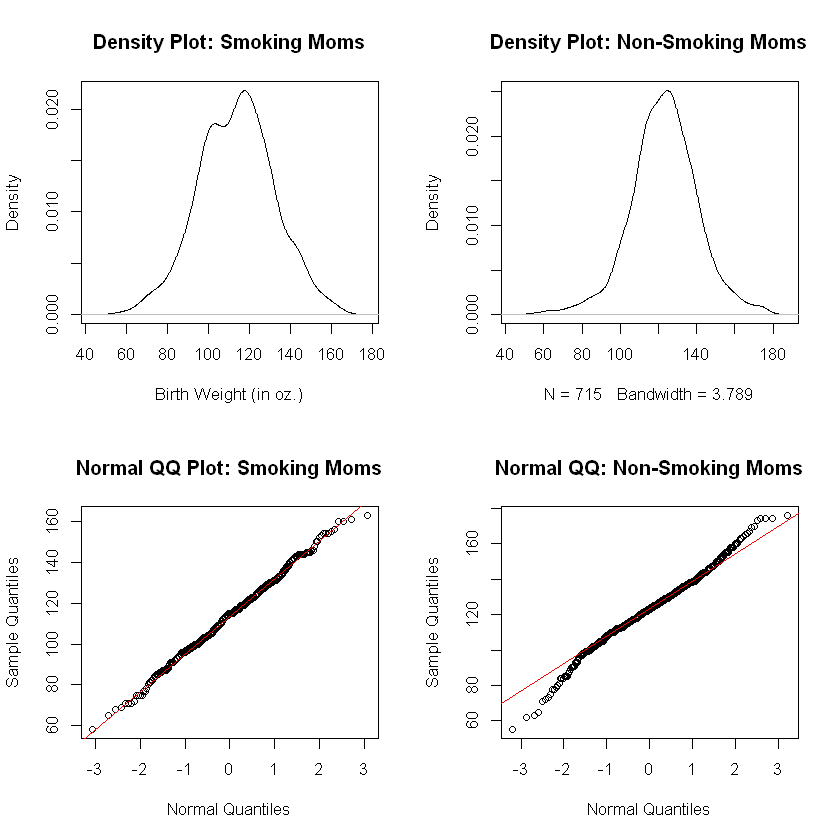

In [9]:
plt <- layout(matrix(c(1,2,3,4), ncol = 2), heights = lcm(9))

plot(density(smoke[ , 'Birth.Weight']), main = 'Density Plot: Smoking Moms', xlab = 'Birth Weight (in oz.)')
plot2 <- { qqnorm(smoke[ , 'Birth.Weight'], main = 'Normal QQ Plot: Smoking Moms', xlab = 'Normal Quantiles')
qqline(smoke[ , 'Birth.Weight'], col = 'red') }
plot(density(non[ , 'Birth.Weight']),main = 'Density Plot: Non-Smoking Moms')
plot3 <- { qqnorm(non[ , 'Birth.Weight'], main = 'Normal QQ: Non-Smoking Moms', xlab = 'Normal Quantiles')
qqline(non[ , 'Birth.Weight'], col = 'red') }

**Analysis of Normality Plots.** The plots for the births to smoking moms data show a normal distribution. The plots for the births to non-smoking moms look good in the case of the density plot and a bit worrisome in the case of the QQ plot.

**Heavy Tails.** The QQ plot for births to non-smoking moms shows evidence of heavy tails. This occurs when more outliers exist in the sample data than would be expected from a perfectly normal distribution. However, this difficulty is not very pronounced. The data here do appear to be approximately normally distributed with the allowance that the second QQ plot indicate the accuracy of the $p$-values resulting from a $t$-test may be compromised slightly.

In the final analysis, we can see the following:

<center><span style="color:purple"><b>These data are appropriate for $t$ procedures with regards to the normality assumption.</b></span></center>

### Verification of the Homogeneity of Variances Assumption

Let's first gather the standard descriptives for the two vectors.

In [10]:
m_s <- mean(smoke[ , 'Birth.Weight'])
s_s <- sd(smoke[ , 'Birth.Weight'])
n_s <- length(smoke[ , 'Birth.Weight'])
cat('The standard descriptives for the births to smoking moms: \n  Mean = ',m_s,'\n  Std. Deviation = ',s_s, '\n  Sample Size = ', n_s, '\n\n')

m_n <- mean(non[ , 'Birth.Weight'])
s_n <- sd(non[ , 'Birth.Weight'])
n_n <- length(non[ , 'Birth.Weight'])
cat('The standard descriptives for the births to non-smoking moms: \n  Mean = ',m_n,'\n  Std. Deviation = ',s_n, '\n  Sample Size = ', n_n)

The standard descriptives for the births to smoking moms: 
  Mean =  113.8192 
  Std. Deviation =  18.29501 
  Sample Size =  459 



The standard descriptives for the births to non-smoking moms: 
  Mean =  123.0853 
  Std. Deviation =  17.4237 
  Sample Size =  715

```{sidebar} Levene Test
Some statisticians suggest conducting Levenes test for equality of the standard deviations. However, this nearly doubles the Type I error rate and decreases the overall power of the $t$-test. In this course, we will not conduct a Levene test for these reasons.
```

With the ratio of largest to smallest sample sizes at $715:459$ approximately $1.56 : 1$ which is far less than $2:1$, we can conclude the group sizes are not **sharply unequal**. Thus, there is no reason to suspect that the homoegeneity of the variances assumption is incorrect here.

<span style="color:purple"><b>We will conduct Welch's $t$-test which does not assume equal standard deviations while avoiding situations where the sample sizes are sharply unequal. These data are appropriate for $t$ procedures with regards to the homogeneity assumption.</b></span>

### Conducting the Independent Samples $t$-Test for Birth Weights

Let's first setup our null and alternative hypotheses:

$$\begin{align}H_0 &: \mu_S = \mu_N\\ H_a &: \mu_S < \mu_N\end{align}$$

We can utilize symbolic notation in R:

```{warning}
Due to the use of symbolic notation, we lose control of which sample mean is subtracted from which. Hence, we run the $t$-test first to see how the subtraction is happening, and again with the correct alternative hypothesis symbol to run the test we wish to conduct.
```

In [11]:
t.test(Birth.Weight ~ Maternal.Smoker, data = births, alternative = 'greater')


	Welch Two Sample t-test

data:  Birth.Weight by Maternal.Smoker
t = 8.6265, df = 941.81, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 7.497579      Inf
sample estimates:
mean in group False  mean in group True 
           123.0853            113.8192 


### Reporting Out

Because $p = 2.2\times 10^{-16} < 0.05 =\alpha$, we reject the null. Thus, we have evidence in favor of the alternative hypothesis that, in fact, the birth weights are higher in the non-smoking moms group than for smoking moms.

### Calculations with Formulas and Tables

Let's recall the values of the standard descriptives so that we can calculate the $t$-statistic. Also, let's link to the [formula sheet](https://faculty.ung.edu/rsinn/3350/StatsFormulas.pdf) for the class and the [$t$ table](https://faculty.ung.edu/rsinn/3350/Table_T.pdf).

In [12]:
cat('The standard descriptives for the births to smoking moms: \n  Mean = ',m_s,'\n  Std. Deviation = ',s_s, '\n  Sample Size = ', n_s, '\n\n')
cat('The standard descriptives for the births to non-smoking moms: \n  Mean = ',m_n,'\n  Std. Deviation = ',s_n, '\n  Sample Size = ', n_n)

The standard descriptives for the births to smoking moms: 
  Mean =  113.8192 
  Std. Deviation =  18.29501 
  Sample Size =  459 



The standard descriptives for the births to non-smoking moms: 
  Mean =  123.0853 
  Std. Deviation =  17.4237 
  Sample Size =  715

#### The $t$ Statistic

The formula from our class formula sheet is as follows:

$$t = \frac{\bar{x_1}-\bar{x_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

We can substitute into this formula values from the lists above rounded to the nearest tenth. We will then simplify and solve:

$$t = \frac{113.8 - 123.1}{\sqrt{\frac{18.3^2}{459} + \frac{17.4^2}{715}}}$$

**Calculations: First Steps**

In [13]:
113.8 - 123.1
18.3^2
17.4^2

[1] -9.3

[1] 334.89

[1] 302.76

$$t = \frac{-9.3}{\sqrt{\frac{334.9}{459} + \frac{302.8}{715}}}$$

**Final Calculations**

In [14]:
-9.9 / sqrt( 334.9 / 459 + 302.8 / 715 )

[1] -9.219275

$$t = -9.22$$

#### Cutoff Value from Table

We are conducting a 1-tailed hypothesis test since

$$H_a : \mu_S < \mu_N$$

with an $\alpha = 0.05$ level of significance. Also, our degrees of freedom (also shown on the formula sheet) for this case:

$$df = \min(n_1-1,n_2-1)$$

Note that, given that both sample sizes reach well into the hundreds, we will use the $\infty$ degrees of freedom row in the table. Thus, we find the cutoff value:

$$t^* = 1.645$$

```{note}
The test statistic we calculated by hand is quite different from the one the computer calculated above. This happens for two reasons.
1. The computer can calculate $t$ while using a much more accurate degrees of freedom value than is practical when using a table.
2. We have rounding error present in our calculated test statistic.
```

#### Reporting Out

We reject the null since $|t| = 9.22 > 1.645 = t^*$. We have evidence for the alternative, that the birth weight of babies born to moms who smoke during pregnancy is less, on average, than the birth weight of babies born to non-smoking moms.